In [16]:
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
 # Read data
df = pd.read_csv('joined_cyberbullying_tweet.csv')

Before Hyperparamater Tuning: 
Training Accuracy: 95.62%
Test Accuracy: 81.98%
                     precision    recall  f1-score   support

                age       0.94      0.97      0.96      1532
          ethnicity       0.97      0.97      0.97      1509
             gender       0.90      0.78      0.83      1479
  not_cyberbullying       0.60      0.49      0.54      1240
other_cyberbullying       0.58      0.74      0.65      1382
           religion       0.90      0.89      0.90      1611

           accuracy                           0.82      8753
          macro avg       0.81      0.81      0.81      8753
       weighted avg       0.83      0.82      0.82      8753



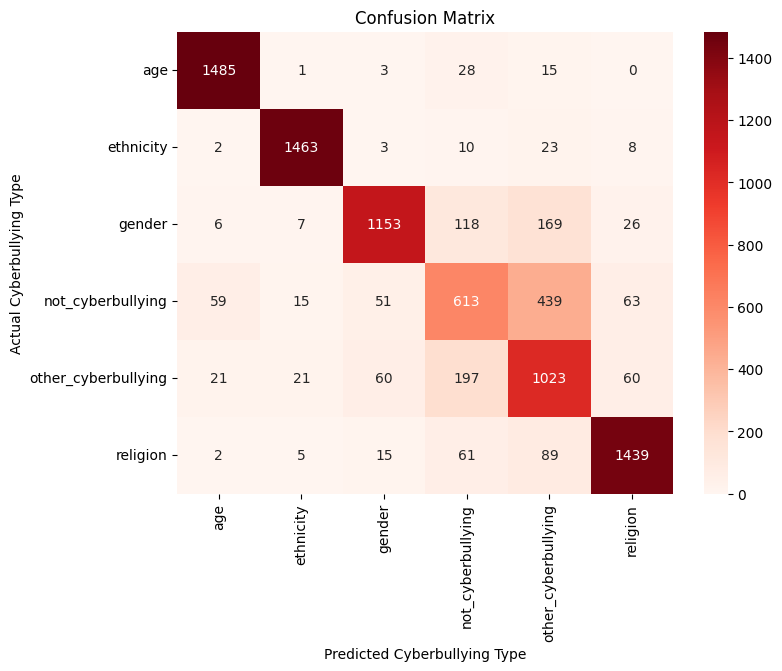

In [18]:
x = df['tweet_text']
y = df['cyberbullying_type']

# Label Encoding
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
 
# Split Data
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state = 42)
 
# Vectorization
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('svm', SVC())
])
 
# Model training
svm_pipeline.fit(x_train,y_train)
 
# Predict
y_train_pred = svm_pipeline.predict(x_train)
y_test_pred = svm_pipeline.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Before Hyperparamater Tuning: ")
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(classification_report(y_test, y_test_pred,target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Cyberbullying Type')
plt.xlabel('Predicted Cyberbullying Type')
plt.show()

In [19]:
# Grid Search
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'vectorizer__max_features': [1000, 5000, 10000],  
    'vectorizer__ngram_range': [(1, 1), (1, 2)]
}
 
grid_search = GridSearchCV(svm_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train,y_train)
 
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validated Score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'svm__C': 1, 'svm__kernel': 'rbf', 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 2)}
Best Mean Cross-validated Score: 0.828515995287122


In [20]:
# Tuned SVM
best_param_svm = {'C': 1, 'kernel':'rbf'}
best_param_vec = {'max_features': 10000, 'ngram_range': (1, 2)}
 
svm_tuned_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(**best_param_vec)),
    ('svm', SVC(**best_param_svm))
])
 
svm_tuned_pipeline.fit(x_train,y_train)
tuned_y_train_pred = svm_tuned_pipeline.predict(x_train)
tuned_y_test_pred= svm_tuned_pipeline.predict(x_test)
 
# Calculate Accuracy
tuned_train_accuracy = accuracy_score(y_train, tuned_y_train_pred)
tuned_test_accuracy = accuracy_score(y_test, tuned_y_test_pred)
print("After Hyperparamater Tuning: ")
print(f'Train Accuracy: {tuned_train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {tuned_test_accuracy*100:.2f}%')
print("Testing Classification Report:")
print(classification_report(y_test_pred, tuned_y_test_pred, target_names=label_encoder.classes_))

After Hyperparamater Tuning: 
Train Accuracy: 95.49%
Testing Accuracy: 82.05%
Testing Classification Report:
                     precision    recall  f1-score   support

                age       0.99      0.99      0.99      1575
          ethnicity       0.99      0.99      0.99      1512
             gender       0.98      0.97      0.97      1285
  not_cyberbullying       0.90      0.88      0.89      1027
other_cyberbullying       0.93      0.94      0.93      1758
           religion       0.98      0.98      0.98      1596

           accuracy                           0.96      8753
          macro avg       0.96      0.96      0.96      8753
       weighted avg       0.96      0.96      0.96      8753

